In [11]:
from statistics import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma.core import greater

In [12]:
df = pd.read_csv("data/advertising.csv")

print("Mau va dac trung :", df.shape)

print("Cot du lieu:", df.columns)

print("Bang gia tri thieu:", df.isnull().sum())


Mau va dac trung : (200, 4)
Cot du lieu: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Bang gia tri thieu: TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


             TV     Sales
TV     1.000000  0.901208
Sales  0.901208  1.000000


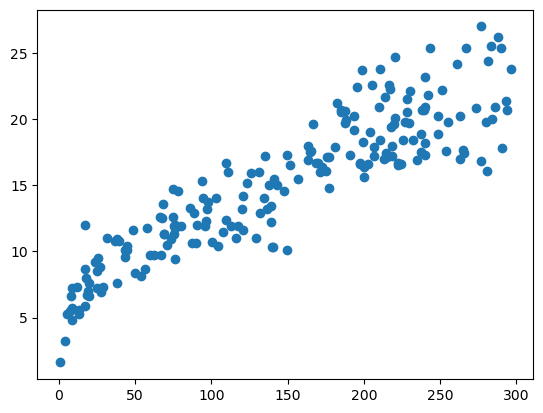

In [13]:
plt.scatter(df['TV'], df['Sales'])
df_tv_sales = df[['TV', 'Sales']]

print(df_tv_sales.corr())

In [14]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

def my_train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("X va Y khong cung chieu du lieu")
        
    n_samples = X.shape[0]
    
    n_train = int(n_samples - (n_samples * test_size))
    
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test


X_scaled = (X - X.min()) / (X.max() - X.min())
print(X_scaled)
one = np.ones((X_scaled.shape[0], 1))
Xbar = np.concatenate((one, X_scaled), axis = 1)

X_train, X_test, y_train, y_test = my_train_test_split(Xbar, y, 0.2, 42)

print (X_train, X_test)
print (y_train, y_test)

           TV     Radio  Newspaper
0    0.775786  0.762097   0.605981
1    0.148123  0.792339   0.394019
2    0.055800  0.925403   0.606860
3    0.509976  0.832661   0.511873
4    0.609063  0.217742   0.510994
..        ...       ...        ...
195  0.126818  0.074597   0.118734
196  0.316199  0.098790   0.068602
197  0.596212  0.187500   0.053650
198  0.956713  0.846774   0.579595
199  0.782550  0.173387   0.073879

[200 rows x 3 columns]
[[1.         0.54988164 0.63709677 0.46262093]
 [1.         0.65843761 0.96169355 0.46262093]
 [1.         0.98816368 0.57056452 0.37730871]
 [1.         0.03719986 0.74395161 0.39489886]
 [1.         0.74264457 0.98790323 0.02550572]
 [1.         0.25160636 0.70564516 0.46086192]
 [1.         0.73080825 0.88508065 0.23658751]
 [1.         0.16672303 0.23387097 0.15919085]
 [1.         0.74974636 0.06854839 0.11257696]
 [1.         0.58978695 0.45362903 0.27440633]
 [1.         0.10415962 0.49596774 0.01671064]
 [1.         0.18769023 0.11491935 0.25

In [15]:
def predict(X, w):
    return X @ w

def loss_function(y_true, y_pred):
    n = y_true.shape[0]
    return (1.0 / n) * (((y_true - y_pred) ** 2).sum())

def gradient(X, y, w):
    n = int(X.shape[0])
    y_pred = predict(X, w)
    error = y - y_pred
    grad = (-2.0 / n) * (X.T @ error)  # Gradient for all weights
    return grad

In [16]:
lr = 0.01
epochs = 1000
w = np.zeros(X_train.shape[1])
losses = []

for epoch in range(epochs):
    grad = gradient(X_train, y_train, w)
    w -= lr * grad
    y_pred = predict(X_train, w)
    loss = loss_function(y_train, y_pred)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss}')

              

Epoch 0, Loss 238.65980417272428
Epoch 100, Loss 10.434702646046745
Epoch 200, Loss 8.244912530517595
Epoch 300, Loss 6.885425689554999
Epoch 400, Loss 5.857018923466583
Epoch 500, Loss 5.076920107186822
Epoch 600, Loss 4.483832752298263
Epoch 700, Loss 4.0318978306638344
Epoch 800, Loss 3.6867327861983314
Epoch 900, Loss 3.4225049455229297


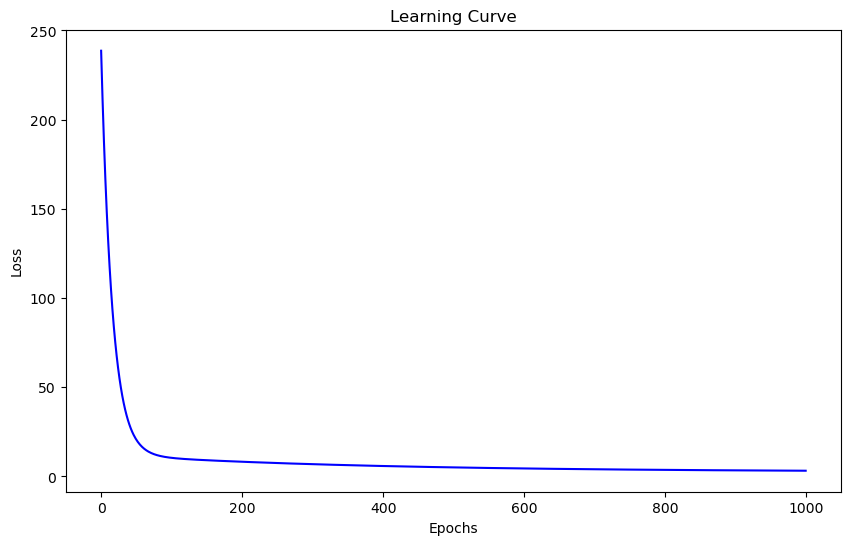

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(losses, color='blue')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Mean Squared Error: 4.624745001131381
Root Mean Squared Error: 2.1505220299107335
Mean Absolute Error: 1.5402219849193615
R-squared: 0.8433436541300762


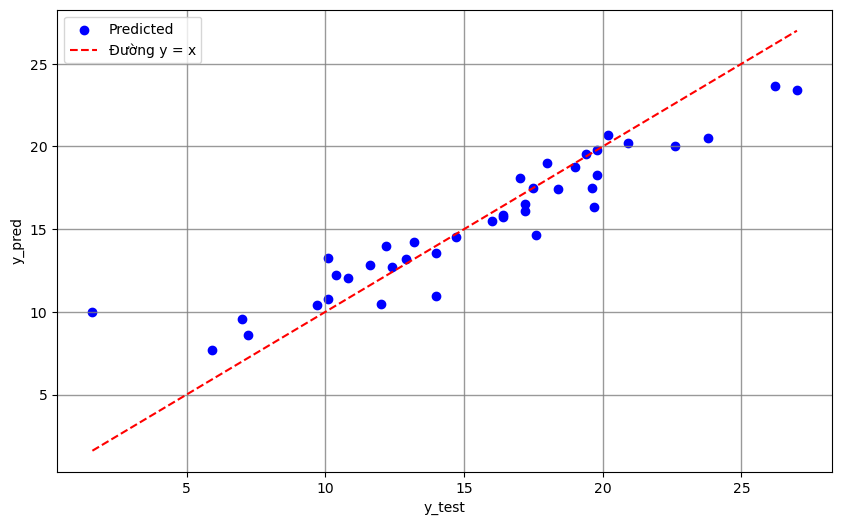

In [18]:
def evaluate(X_test, y_test, w):
    y_pred = predict(X_test, w)
    mse = (1 / X_test.shape[0]) * (((y_pred - y_test) ** 2).sum())
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    mae = np.mean(np.abs(y_test - y_pred))
    r2 = 1 - (((y_pred - y_test) ** 2).sum()) / (((y_test - y_test.mean()) ** 2).sum())
    # return mse, rmse, mae, r2
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label='Đường y = x')
    plt.grid(True, linestyle='-', linewidth=1, color='gray', alpha=0.8)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.legend()
    
evaluate(X_test, y_test, w)
    

Mean Squared Error: 4.624745001131381
Root Mean Squared Error: 2.1505220299107335
Mean Absolute Error: 1.5402219849193615
R-squared: 0.8433436541300762
Mean Squared Error: 13.292959426541216
Root Mean Squared Error: 3.645951100404559
Mean Absolute Error: 2.988001290321788
R-squared: 0.5497208064337239
Mean Squared Error: 152.52765514807612
Root Mean Squared Error: 12.35020870868489
Mean Absolute Error: 11.428446134377685
R-squared: -4.166647046217689


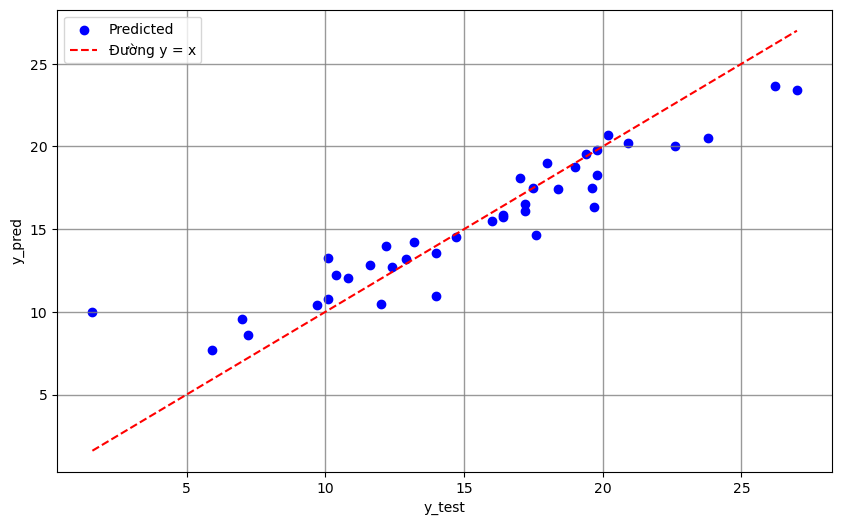

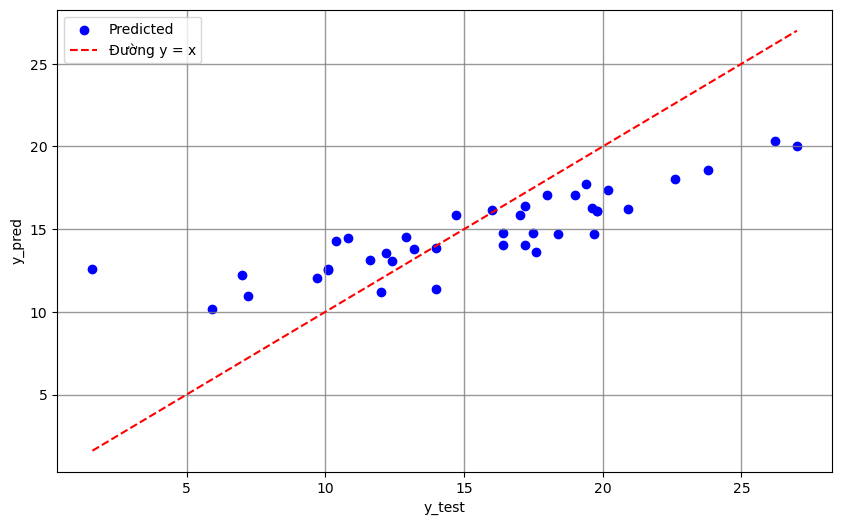

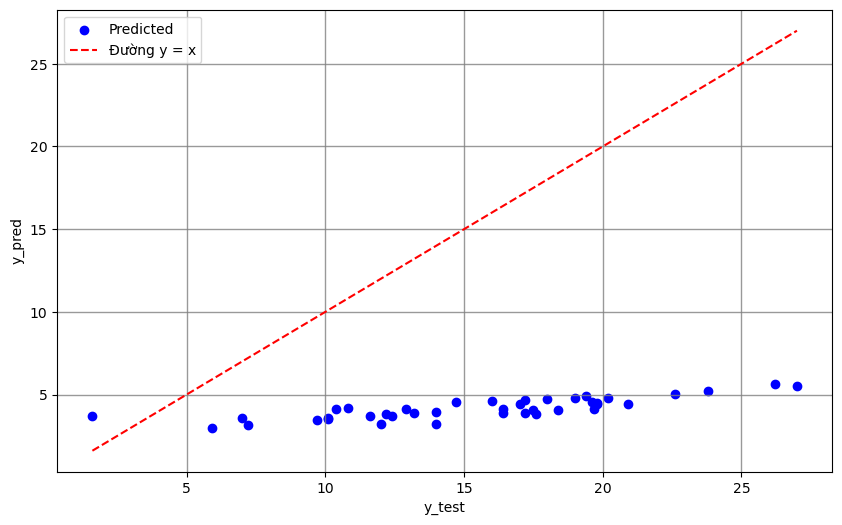

In [19]:
def multiple_linear_regression(X_train, y_train, w, lr = 0.01, epochs = 1000):
    for epoch in range(epochs):
        grad = gradient(X_train, y_train, w)
        w -= lr * grad
    return w

w = np.zeros(X_train.shape[1])
w = multiple_linear_regression(X_train, y_train, w, 0.01, 1000)
evaluate(X_test, y_test, w)

w = np.zeros(X_train.shape[1])
w = multiple_linear_regression(X_train, y_train, w, 0.001, 1000)
evaluate(X_test, y_test, w)

w = np.zeros(X_train.shape[1])
w = multiple_linear_regression(X_train, y_train, w, 0.0001, 1000)
evaluate(X_test, y_test, w)



[24.82567328 10.79135457 16.35687043 24.69750969 13.45332324 21.92871916
  9.57603645 15.72282048 10.31038986 21.36647874 18.54324733 12.10576454
 17.97824944 14.10115594 15.89937169  6.04867212  9.15845911 14.03264538
 12.8670209  18.24856623 11.31577518 20.8032249   9.90621091  9.07284328
 12.04712768 16.65249505 16.4376564  13.71084205 14.97009331 18.83434295
  8.01224465 18.10446449 19.35948119 21.58067446 12.12260066  7.22146195
 19.1734772  19.94196084 14.67411429 20.82098256] [27.  10.8 17.2 26.2 14.  20.2 12.  16.4 14.  23.8 19.8 12.9 17.5 13.2
 16.4  5.9  9.7 14.7 10.1 19.6 10.4 22.6 10.1  1.6 11.6 19.7 17.2 12.2
 16.  17.   7.  18.4 18.  20.9 12.4  7.2 19.  19.4 17.6 19.8]
0.8808071655292993


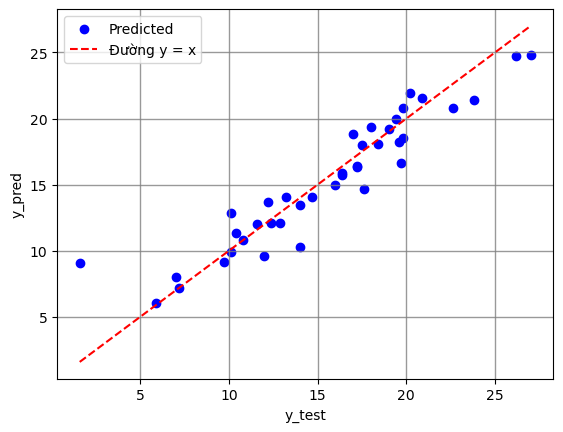

In [23]:
import models

Linear = (models.LinearRegression(learning_rate=0.1, epochs=1000, bias=1))
Linear.fit(X_train, y_train)

y_pred = Linear.predict(X_test)

print(y_pred, y_test) 

plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
     color='red', linestyle='--', label='Đường y = x')
plt.grid(True, linestyle='-', linewidth=1, color='gray', alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()

print(models.r2(y_test, y_pred))
